In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('merged_data_modified.csv')
df.head(3)

,Location Name,Sub,Plot Discarded,Plot Status,Analysis State,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,...,Cloud Cover,Relative Humidity,Conditions,w2Droughts,w3Droughts,xtremeheats,Lowtemp,FastWinds,heavyrain,monthlyRain
0,"Waseca, Minnesota",NaN,Yes,3 - Bad,Blessed,95.0,42.8,84.2,47.3,102.3,...,88.2,90.44,"Rain, Partially cloudy",0,0,0,0,0,2,True
1,"Waseca, Minnesota",NaN,Yes,3 - Bad,Blessed,95.0,42.8,84.2,47.3,102.3,...,88.2,90.44,"Rain, Partially cloudy",0,0,0,0,0,2,True
2,"Waseca, Minnesota",NaN,Yes,3 - Bad,Blessed,95.0,42.8,84.2,47.3,102.3,...,88.2,90.44,"Rain, Partially cloudy",0,0,0,0,0,2,True


In [13]:
df.shape

(578490, 27)

In [14]:
df['Discarded'] = np.nan
mask = (df['Plot Discarded'] == "Yes") | (df['Plot Status'] == "3 - Bad") | (df['Analysis State'] == "Bad")
df['Discarded'][mask] = 1
df['Discarded'] = df['Discarded'].fillna(0)
df = df.dropna(subset=["Plot Discarded", "Plot Status", "Analysis State"], how='all')
df["monthlyRain"] = df["monthlyRain"].astype(int)
#did not take into account the sub column

<ipython-input-14-41f47a312beb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discarded'][mask] = 1


In [15]:
df = df.drop(columns=['Location Name', 'Sub', 'Plot Discarded', 'Plot Status', 'Analysis State','Conditions'])

In [16]:
df.head(10)

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,...,Cloud Cover,Relative Humidity,w2Droughts,w3Droughts,xtremeheats,Lowtemp,FastWinds,heavyrain,monthlyRain,Discarded
0,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,1.0
1,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,1.0
2,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,1.0
3,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,1.0
4,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,1.0
5,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,1.0
6,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,0.0
7,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,0.0
8,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,0.0
9,95.0,42.8,84.2,47.3,102.3,2.85,0,0,28.3,310.96,...,88.2,90.44,0,0,0,0,0,2,1,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Discarded'], df.Discarded, test_size = 0.2, random_state = 0)

In [18]:
y_train

46282     1.0
352532    0.0
206489    0.0
549920    0.0
83450     0.0
         ... 
202827    1.0
555385    0.0
160169    0.0
551555    0.0
395228    1.0
Name: Discarded, Length: 364905, dtype: float64

In [19]:
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

In [20]:
param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 2
}
epochs = 10

In [21]:
model = xgb.train(param, train, epochs)

[03:24:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
predictions = model.predict(test)

In [23]:
print(predictions[:50])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0.]


In [24]:
accuracy_score(y_test, predictions)

0.8614226051497912

In [25]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

C:\Users\Mark\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:24:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


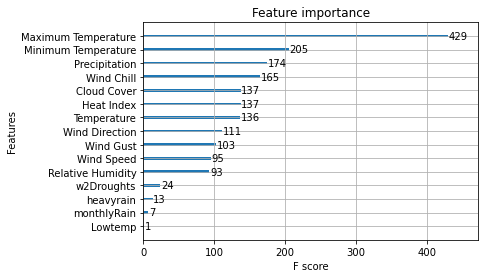

In [26]:
# split data into X and y
X = df.loc[:, df.columns != 'Discarded']
y = df.Discarded
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.DataFrame(list(zip(predictions, y_test)),
               columns =['prediction', 'actual'])
df

,prediction,actual
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
91222,0.0,0.0
91223,0.0,0.0
91224,0.0,0.0
91225,0.0,0.0


In [103]:
confusion_matrix = pd.crosstab(df['actual'], df['prediction'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0.0,1.0
Actual,,
0.0,68695,1179
1.0,11522,9831


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

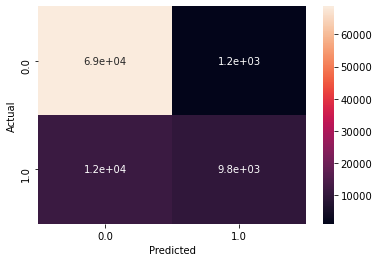

In [104]:
data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [140]:
#Recall measures correctly predicted positive cases from all the actual positive cases. 
#It is important when the cost of False Negatives is high.
#i.e. 0.54 chance that a failing plot will be identified as a-ok.
recall = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1]) #tp / (tp + fn)

#Specificity is favorable to measure when high # of False Positives is problematic.
#i.e. 0.98 chance that when the model says the plot is ok, the plot is ok.
#i.e. 0.02 means there's very little chance that if there's a normal plot, the model will think it failed.
specificity = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0]) #tn / (fp + tn)

#Precision is useful when the cost of False positives is high.
#i.e. 0.89 when the model labels a plot as failed, we're confident that it's right.
precision = confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1]) #tp / (tp + fp)

#F1 score is the harmonic mean of precision and recall
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0])
print(f"recall: {recall}")
print(f"specificity: {specificity}")
print(f"precision: {precision}")
print(f"f1: {f1}")
print(f"accuracy: {accuracy}")

recall: 0.46040369034796047
specificity: 0.9831267710450239
precision: 0.8929155313351499
f1: 0.6075456539875783
accuracy: 0.860775866793822


In [138]:
confusion_matrix[1][0]

1179

In [120]:
from hyperopt import hp
import numpy as np
from sklearn.metrics import mean_squared_error

In [130]:
xgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     100,
}
xgb_fit_params = {
    'eval_metric': 'rmse',
    'early_stopping_rounds': 10,
    'verbose': False
}
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))

In [131]:
import xgboost as xgb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials


class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def xgb_reg(self, para):
        reg = xgb.XGBRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [132]:
obj = HPOpt(X_train, X_test, y_train, y_test)

In [134]:
xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=100)

100%|█████████████████████████████████████████████| 100/100 [20:26<00:00, 12.26s/trial, best loss: 0.32037941235139966]


100%|███████████████████████████████████████████| 500/500 [00:02<00:00, 223.40trial/s, best loss: -0.24999743162846244]
{'x': 0.49839738602977157}


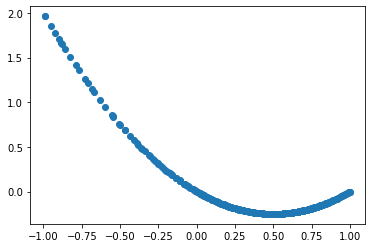

In [135]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import matplotlib.pyplot as plt

# Define objective function
def f(x):
    return {'loss': x ** 2 - x, 'status': STATUS_OK}

# Run hyperopt optimization
trials = Trials()
result = fmin(
    fn=f,                           # objective function
    space=hp.uniform('x', -1, 1),   # parameter space
    algo=tpe.suggest,               # surrogate algorithm
    max_evals=500,                  # no. of evaluations
    trials=trials                   # trials object that keeps track of the sample results (optional)
)

# Print the optimized parameters
print(result)   # {'x': 0.5000833960783931}

# Extract and plot the trials 
x = trials.vals['x']
y = [x['loss'] for x in trials.results]
plt.scatter(x, y)